In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
heart= pd.read_csv('heart.csv')

In [6]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [10]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

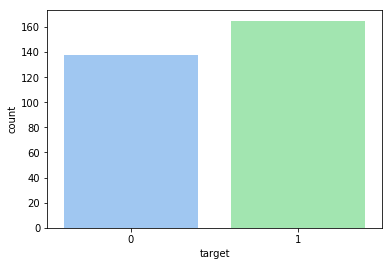

In [12]:
# 0: No cancer 1: cancer
sns.countplot(x='target',data=heart,palette='pastel')

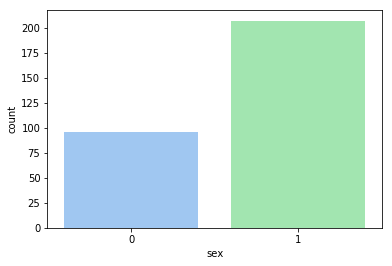

In [13]:
#male female comparison, o:female, 1: male
sns.countplot(x='sex',data=heart,palette='pastel')

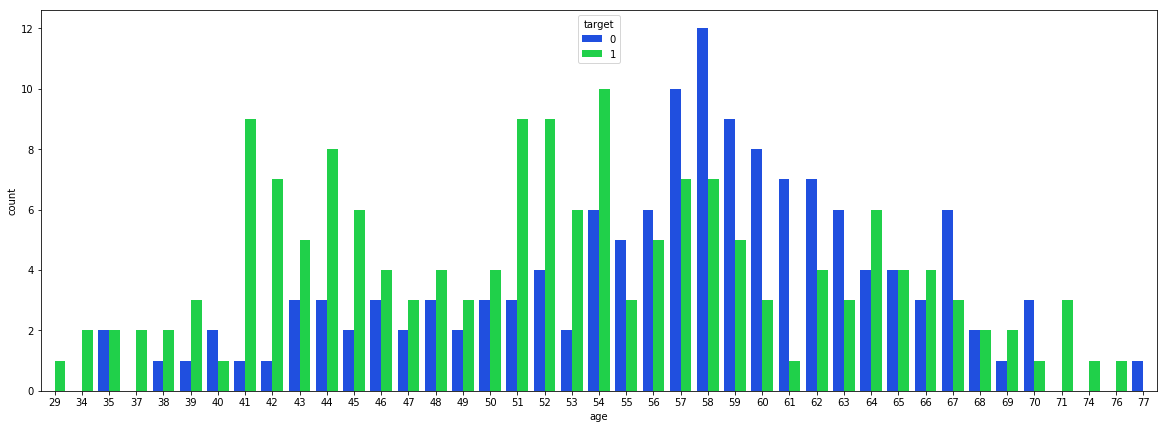

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(x='age',data = heart, hue = 'target',palette='bright')
plt.show()

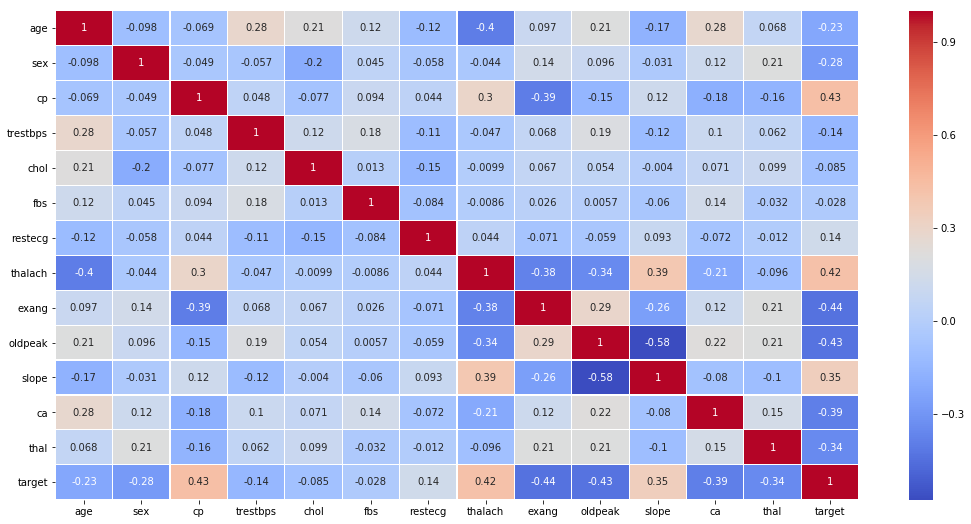

In [26]:
plt.figure(figsize=(18,9))
sns.heatmap(heart.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

D:\Jupyter\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


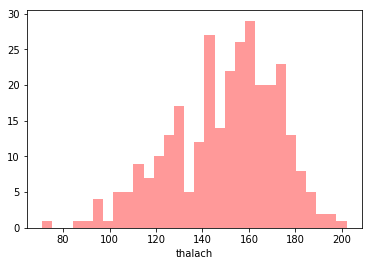

In [35]:
sns.distplot(heart['thalach'],kde=False,bins=30,color='r')

D:\Jupyter\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


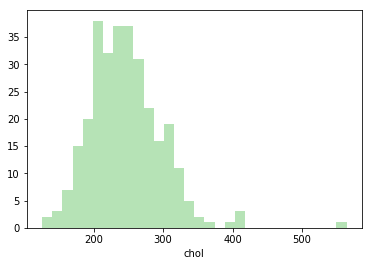

In [39]:
sns.distplot(heart['chol'],kde=False,bins=30,color='#4AB94A')

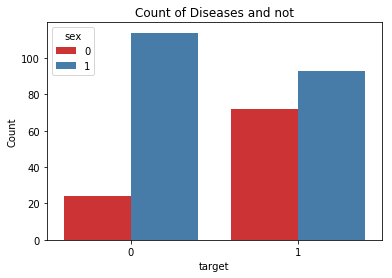

In [44]:
sns.countplot(heart.target,hue=heart.sex, palette="Set1")
plt.title("Count of Diseases and not")
plt.xlabel("target")
plt.ylabel("Count")
plt.show()

In [47]:
X_data= heart.drop('target',axis=1)
y_labels=heart['target']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.3, random_state=101)

In [52]:
import tensorflow as tf

D:\Jupyter\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [53]:
sex= tf.feature_column.categorical_column_with_vocabulary_list("sex",[0,1])
#sex=tf.feature_column.numeric_column("sex")

In [61]:
age= tf.feature_column.numeric_column("age")
cp= tf.feature_column.numeric_column("cp")
trestbps= tf.feature_column.numeric_column("trestbps")
chol= tf.feature_column.numeric_column("chol")
fbs=tf.feature_column.numeric_column("fbs")
restecg=tf.feature_column.numeric_column("restecg")
thalach=tf.feature_column.numeric_column("thalach")
exang=tf.feature_column.numeric_column("exang")
oldpeak=tf.feature_column.numeric_column("oldpeak")
slope=tf.feature_column.numeric_column("slope")
ca=tf.feature_column.numeric_column("ca")
thal=tf.feature_column.numeric_column("thal")
#target=tf.feature_column.numeric_column("target")

In [62]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [67]:
feat_col= [sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]

In [68]:
input_func= tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=100, num_epochs=None, shuffle=True)

In [69]:
model= tf.estimator.LinearClassifier(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SIFATI~1\\AppData\\Local\\Temp\\tmpd2__1txm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017249F32128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [70]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SIFATI~1\AppData\Local\Temp\tmpd2__1txm\model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 298.016
INFO:tensorflow:loss = 81.49966, step = 101 (0.340 sec)
INFO:tensorflow:global_step/sec: 424.294
INFO:tensorflow:loss = 47.10617, step = 201 (0.236 sec)
INFO:tensorflow:global_step/sec: 424.224
INFO:tensorflow:loss = 70.76419, step = 301 (0.236 sec)
INFO:tensorflow:global_step/sec: 431.683
INFO:tensorflow:loss = 51.142532, step = 401 (0.228 sec)
INFO:tensorflow:global_step/sec: 424.294
INFO:tensorflow:loss = 40.41378, step = 501 (0.236 sec)
INFO:tensorflow:global_step/sec: 424.222
INFO:tensorflow:loss = 40.56368, step = 601 (0.240 sec)
INFO:tensorflow:global_step/sec

In [71]:
pred_fn= tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

In [72]:
pred_gen= model.predict(input_fn=pred_fn)

In [73]:
prediction= list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SIFATI~1\AppData\Local\Temp\tmpd2__1txm\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [74]:
final_pred= [pred['class_ids'][0] for pred in prediction]

In [76]:
from sklearn.metrics import classification_report

In [78]:
result=classification_report(y_test,final_pred)

In [79]:
print(result)

             precision    recall  f1-score   support

          0       0.83      0.86      0.84        44
          1       0.87      0.83      0.85        47

avg / total       0.85      0.85      0.85        91

